<a href="https://colab.research.google.com/github/aandreigg/AACMM2023/blob/testing/Denavit-Hartenberg-Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from keras import metrics
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
#import pygame as pg
import random as r
import math as m
from math import exp

In [ ]:
cloud_number = 10000 #Numero de posiciones para la red neuronal. 
DH_dataset = np.zeros((cloud_number,28), dtype = np.float64) #print(DH_dataset)

In [ ]:
DOF = 6 #Degrees of freedom o grados de libertad del robot. 
a = np.zeros(DOF,dtype=np.float64)
d = np.zeros(DOF,dtype=np.float64)
alpha = np.zeros(DOF,dtype=np.float64)
theta = np.zeros(DOF,dtype=np.float64)
k= 0 

In [ ]:
a[1]=62.0000
a[3]=62.0000
d[0]=376.0000
d[2]=751.0000
d[4]=500.0000
d[5]=15.0000
alpha[0]=round(-m.pi/2,4) # Valores en radianes. (En este caso -90°)
alpha[1]=round(-m.pi/2,4)
alpha[2]=round(-m.pi/2,4)
alpha[3]=round(-m.pi/2,4)
alpha[4]=round(-m.pi/2,4)
alpha[5]=round(m.pi/2,4)
l=98.0000 #Dimension del punto final 

In [ ]:
print(alpha[0])

-1.5708


In [ ]:
for i in range(cloud_number): #Simulando los rangos de operación de las articulaciones. 
    cxyz = np.array([[0],[0],[l],[1]])
    
    DH_dataset[i][0]=round((r.randint(-180,180) * m.pi/180),4)
    theta[0] = DH_dataset[i][0]
    DH_dataset[i][1]=round((r.randint(-180,180) * m.pi/180),4)
    theta[1] = DH_dataset[i][1]
    DH_dataset[i][2]=round((r.randint(-180,180) * m.pi/180),4)
    theta[2] = DH_dataset[i][2]
    DH_dataset[i][3]=round((r.randint(-180,180) * m.pi/180),4)
    theta[3] = DH_dataset[i][3]
    DH_dataset[i][4]=round((r.randint(-180,180) * m.pi/180),4)
    theta[4] = DH_dataset[i][4]
    DH_dataset[i][5]=round((r.randint(-180,180) * m.pi/180),4)
    theta[5] = DH_dataset[i][5]

    DH_dataset[i][6:11] = a[0:5]
    DH_dataset[i][12:17] = alpha[0:5]
    DH_dataset[i][17] = alpha[5]
    DH_dataset[i][18:23] = d[0:5] 
    DH_dataset[i][24] = l
    
    k=0
    while(k<=DOF-1): # El orden de multiplicacion de las matrices si afecta el producto. 
        TDH = np.zeros(16,dtype=np.float64)
        TDH[0] = m.cos(theta[k])
        TDH[1] = -m.cos(alpha[k])*m.sin(theta[k])
        TDH[2] = m.sin(alpha[k])*m.sin(theta[k])
        TDH[3] = a[k]*m.cos(theta[k])
        TDH[4] = m.sin(theta[k])
        TDH[5] = m.cos(alpha[k])*m.cos(theta[k])
        TDH[6] = -m.sin(alpha[k])*m.cos(theta[k])
        TDH[7] = a[k]*m.sin(theta[k])
        TDH[8] = 0
        TDH[9] = m.sin(alpha[k])
        TDH[10]= m.cos(alpha[k])
        TDH[11]= d[k]
        TDH[12]= 0
        TDH[13]= 0
        TDH[14]= 0
        TDH[15]= 1
        #Se acomoda de esta forma la matriz para poder emplear el comando ".dot" de numpy.
        TDH = TDH.reshape(4,4)
        cxyz = np.dot(TDH,cxyz)
        k+=1

    
    np.round(cxyz,4)
    DH_dataset[i][25] = cxyz[0]    
    DH_dataset[i][26] = cxyz[1]
    DH_dataset[i][27] = cxyz[2]#print(cxyz)
      

In [ ]:
print(DH_dataset[0][0:27])


[ 9.42500000e-01 -2.33870000e+00  1.75000000e-02 -3.07180000e+00
 -3.05430000e+00  8.73000000e-02  0.00000000e+00  6.20000000e+01
  0.00000000e+00  6.20000000e+01  0.00000000e+00  0.00000000e+00
 -1.57080000e+00 -1.57080000e+00 -1.57080000e+00 -1.57080000e+00
 -1.57080000e+00  1.57080000e+00  3.76000000e+02  0.00000000e+00
  7.51000000e+02  0.00000000e+00  5.00000000e+02  0.00000000e+00
  9.80000000e+01  4.10026987e+02 -1.49133194e+03]


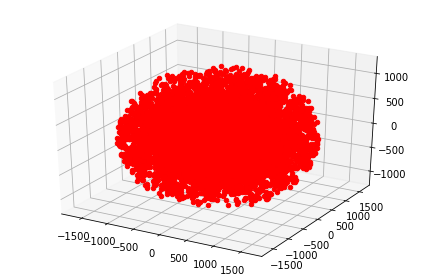

In [ ]:
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cloud_number):
    ax.scatter(DH_dataset[i][25],DH_dataset[i][26],DH_dataset[i][27], c='red')


DH_dataset = pd.DataFrame(DH_dataset, columns = ['T1','T2','T3','T4','T5','T6','a0','a1','a2','a3','a4','a5','al0','al1','al2','al3','al4','al5'
,'d0','d1','d2','d3','d4','d5','l','X1','Y2','Z3']) #print(DH_dataset) 

In [ ]:
DH_dataset.to_csv('sample.csv')
from google.colab import files
files.download("sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>